In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

In [2]:
# 데이터 읽기
raw_data = pd.read_csv('linear_regression_data.csv', encoding='utf-8', engine='python')
raw_data.head()

,tall,weight,label
0,152.6,44.7,11.5
1,160.4,39.9,15.8
2,112.2,21.1,6.6
3,159.3,46.4,15.6
4,150.9,46.6,11.0


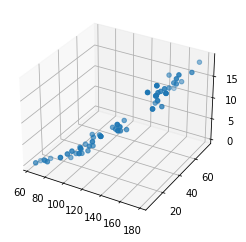

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

tall = raw_data['tall'].to_numpy()
weight = raw_data['weight'].to_numpy()
age = raw_data['label'].to_numpy()
ax.scatter(tall,weight,age)
plt.show()

In [4]:
# split raw data into X and label
X = raw_data[['tall', 'weight']].to_numpy()
X = np.c_[X, np.ones(80)]
y = raw_data['label'].to_numpy()
y = y.reshape(80,1)
print('X :',X)
print('y:', y)

X : [[152.6  44.7   1. ]
 [160.4  39.9   1. ]
 [112.2  21.1   1. ]
 [159.3  46.4   1. ]
 [150.9  46.6   1. ]
 [ 91.7  13.1   1. ]
 [ 74.8   8.    1. ]
 [111.1  16.1   1. ]
 [162.9  43.8   1. ]
 [131.3  27.6   1. ]
 [105.3  19.2   1. ]
 [177.8  61.7   1. ]
 [101.8  16.8   1. ]
 [151.5  49.    1. ]
 [ 86.2  11.    1. ]
 [137.8  23.7   1. ]
 [160.1  40.6   1. ]
 [119.9  21.2   1. ]
 [156.4  65.9   1. ]
 [154.7  48.1   1. ]
 [ 64.4   5.5   1. ]
 [ 67.5   7.7   1. ]
 [ 70.7   8.6   1. ]
 [162.1  49.4   1. ]
 [167.3  55.6   1. ]
 [155.   35.8   1. ]
 [ 70.7   8.6   1. ]
 [ 74.8   8.    1. ]
 [130.5  26.5   1. ]
 [ 91.7  13.1   1. ]
 [108.6  23.4   1. ]
 [160.1  40.6   1. ]
 [ 94.7  15.1   1. ]
 [ 95.3  13.2   1. ]
 [162.7  46.9   1. ]
 [131.6  35.1   1. ]
 [154.7  61.4   1. ]
 [ 64.4   5.5   1. ]
 [159.6  71.5   1. ]
 [115.6  24.2   1. ]
 [ 72.2   8.3   1. ]
 [124.6  29.4   1. ]
 [134.5  27.8   1. ]
 [171.3  53.6   1. ]
 [162.1  49.4   1. ]
 [155.   35.8   1. ]
 [ 76.7   9.7   1. ]
 [159.6  

In [5]:
analytic_W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print(analytic_W)

[[  0.16248137]
 [  0.01980255]
 [-12.27584624]]


GD

In [6]:
def numerucal_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    for idx in range(W.size):
        tmp_val = W[idx]
        # f(x+h)
        W[idx] = tmp_val+h
        fxh1 = f(W,X,y)

        # f(x-h)
        W[idx] = tmp_val-h
        fxh2 = f(W,X,y)    

        grad[idx] = (fxh1-fxh2)/(2*h)
        W[idx] = tmp_val
    return grad

In [7]:
GD_W = np.random.rand(3).reshape(3,1)

def fucntion_MSE(W,X,y):
    mse = np.zeros(len(X))
    for idx in range(len(X)):
        mse[idx] = (np.dot(W.T,X[idx])-y[idx])**2
    mse = np.sum(mse)/len(X)
    return mse

print(numerucal_gradient(fucntion_MSE, GD_W, X, y))
print(numerucal_gradient(fucntion_MSE, analytic_W, X, y))

[[14873.44987049]
 [ 3941.07874591]
 [  109.73488344]]
[[8.50395425e-01]
 [6.40876688e-02]
 [5.00000008e-05]]


In [52]:
eta = 0.000105
idx = 0
while True:
    tmp_W = GD_W
    GD_W = tmp_W - eta*numerucal_gradient(fucntion_MSE, tmp_W, X, y)
    idx = idx+1
    print(f"{idx}번째 ============> 현재 W 값 : {GD_W.flatten()}")
    if np.array_equal(GD_W, tmp_W):
        print('Gradient Descent를 종료합니다.')
        break

1번째 ============> 현재 W 값 : [-0.4711055   0.30550706  0.15549158]
2번째 ============> 현재 W 값 : [0.40202098 0.5320629  0.16196453]
3번째 ============> 현재 W 값 : [-0.46892334  0.30089408  0.15553108]
4번째 ============> 현재 W 값 : [0.40236946 0.5270361  0.16198931]
5번째 ============> 현재 W 값 : [-0.46677596  0.29640601  0.15556804]
6번째 ============> 현재 W 값 : [0.40268737 0.52213357 0.16201162]
7번째 ============> 현재 W 값 : [-0.46466252  0.2920396   0.15560254]
8번째 ============> 현재 W 값 : [0.40297553 0.51735211 0.16203152]
9번째 ============> 현재 W 값 : [-0.46258218  0.28779171  0.15563463]
10번째 ============> 현재 W 값 : [0.40323477 0.5126886  0.16204908]
11번째 ============> 현재 W 값 : [-0.46053414  0.28365926  0.15566437]
12번째 ============> 현재 W 값 : [0.40346587 0.50814001 0.16206434]
13번째 ============> 현재 W 값 : [-0.45851759  0.27963924  0.15569183]
14번째 ============> 현재 W 값 : [0.40366961 0.50370338 0.16207738]
15번째 ============> 현재 W 값 : [-0.45653178  0.27572875  0.15571707]
16번째 ============> 현재 W 값 : [0.40384673 

KeyboardInterrupt: 